# Tutorial 8B: Data Normalisation and Transformation

When one or more datasets affects results disproportionately, normalization or scaling gives a level playing field. In this activity, we will apply different data methods for data normalisation and transformation. We first read the dataset that is used for the first part of the analysis. 


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv( 'wine_data.csv',
     header = None,
     usecols = [0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [2]:
df.describe()

,Class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [3]:
# As we can see in the tables above, the features, Alcohol (percent/volumne) and Malic acid (g/l) 
# are measured on different scales, so scaling is necessary prior to any comparison or combination of data.
df.Alcohol.mean() / df["Malic acid"].mean() # difference is factor of ~5x


5.564503330367661

## Z-Score Normalisation (standardisation): 

We use sklearn linrary for standardise data (mean=0, SD=1). 

In [4]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']]) # an array not a df

In [5]:
std_scale.fit # defaults mean & std

<bound method StandardScaler.fit of StandardScaler(copy=True, with_mean=True, with_std=True)>

In [6]:
df_std[0:5] # the scaled data (some of it)

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [7]:
# put it alongside data... to view
df['Ascaled'] = df_std[:,0] # so 'Ascaled' is Alcohol scaled

In [8]:
df['MAscaled'] = df_std[:,1] # and 'MAscaled' is Malic acid scaled

In [9]:
df.head()

,Class label,Alcohol,Malic acid,Ascaled,MAscaled
0,1,14.23,1.71,1.518613,-0.562250
1,1,13.20,1.78,0.246290,-0.499413
2,1,13.16,2.36,0.196879,0.021231
3,1,14.37,1.95,1.691550,-0.346811
4,1,13.24,2.59,0.295700,0.227694


Now, display the normalised values for both features. They have mean of 0 and SD= 1

In [10]:
df.describe() # check that μ = 0 and σ = 1... approx

,Class label,Alcohol,Malic acid,Ascaled,MAscaled
count,178.000000,178.000000,178.000000,1.780000e+02,1.780000e+02
mean,1.938202,13.000618,2.336348,-8.619821e-16,-8.357859e-17
std,0.775035,0.811827,1.117146,1.002821e+00,1.002821e+00
min,1.000000,11.030000,0.740000,-2.434235e+00,-1.432983e+00
25%,1.000000,12.362500,1.602500,-7.882448e-01,-6.587486e-01
50%,2.000000,13.050000,1.865000,6.099988e-02,-4.231120e-01
75%,3.000000,13.677500,3.082500,8.361286e-01,6.697929e-01
max,3.000000,14.830000,5.800000,2.259772e+00,3.109192e+00


Print out values:

In [11]:
print('Mean after standardisation:\nAlcohol = {:.2f}, Malic acid = {:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardisation:\nAlcohol = {:.2f}, Malic acid = {:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

# Mean after standardization:
# Alcohol=0.00, Malic acid=0.00
# force those tiny little numbers (-8.619821e-16 & -8.357859e-17) to behave...
# Standard deviation after standardization:
# Alcohol=1.00, Malic acid=1.00

Mean after standardisation:
Alcohol = -0.00, Malic acid = -0.00

Standard deviation after standardisation:
Alcohol = 1.00, Malic acid = 1.00


#### We plot first the data before normalisation. 

(<matplotlib.axes._subplots.AxesSubplot at 0x114d2e450>,
 <matplotlib.axes._subplots.AxesSubplot at 0x114d2e450>)

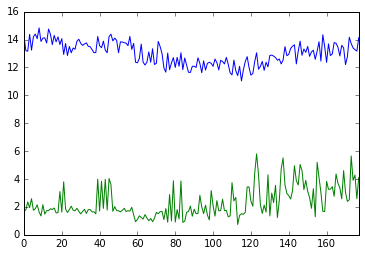

In [12]:
%matplotlib inline
df["Alcohol"].plot(), df["Malic acid"].plot()

#### Now, we plot  the standardised data 
Observe the range and the centre of the distribution for the standardised features. 

(<matplotlib.axes._subplots.AxesSubplot at 0x11708b7d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11708b7d0>)

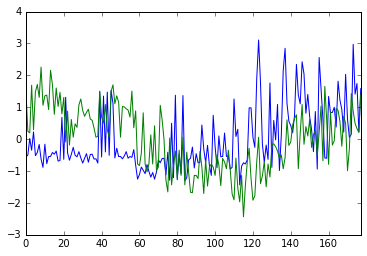

In [13]:
# or split them from the others
df["MAscaled"].plot(), df["Ascaled"].plot()


You can see from above graphs that both original and standardised data are in the same shape but shifted. What is the color of the normalised line?


(<matplotlib.axes._subplots.AxesSubplot at 0x117732bd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117732bd0>)

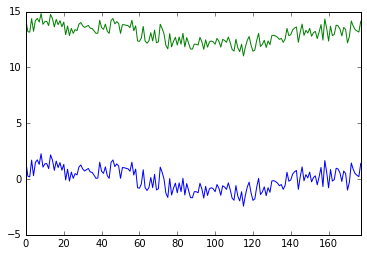

In [14]:
df["Ascaled"].plot(), df["Alcohol"].plot()


(<matplotlib.axes._subplots.AxesSubplot at 0x11780cb50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11780cb50>)

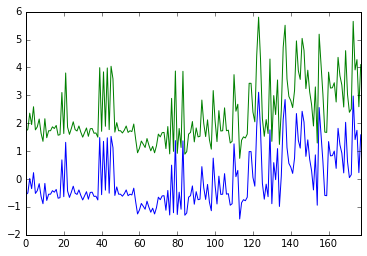

In [15]:
df["MAscaled"].plot(), df["Malic acid"].plot()


#  MinMax Noramlisation:

In this section, we discuss a different type of normalisation for reshaping the range of data. We process the same data we used in the previous section. We can implement this eith either sklearn or manually. 

#### * Using sklearn:

In [16]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [17]:
df_minmax[0:5]

array([[ 0.84210526,  0.1916996 ],
       [ 0.57105263,  0.2055336 ],
       [ 0.56052632,  0.3201581 ],
       [ 0.87894737,  0.23913043],
       [ 0.58157895,  0.36561265]])

### *Manually:

In [18]:
# DIY MinMax, be careful with -ves, may need abs
# df.Alcohol.describe()
minA = df.Alcohol.min()
maxA = df.Alcohol.max()
a = df.Alcohol[0] # the first value, for practice
a, minA, maxA # so our test subject is much nearer max, it should scale to around 0.9

(14.23, 11.029999999999999, 14.83)

In [19]:
mma = (a - minA) / (maxA - minA)
mma # and compare with the previous method

0.84210526315789491

In [20]:
df_minmax[0][0] # same

0.84210526315789513

In [21]:
df[df.Alcohol == df.Alcohol.max()] # where is max?

,Class label,Alcohol,Malic acid,Ascaled,MAscaled
8,1,14.83,1.64,2.259772,-0.625086


In [22]:
a = df.Alcohol[8]
a

14.83

In [23]:
mma = (a - minA) / (maxA - minA)
mma # max should map to 1.0 exactly (same for min)

1.0

In [24]:
print('Min-value after min-max scaling:\nAlcohol = {:.2f}, Malic acid = {:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol = {:.2f}, Malic acid = {:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))
# Min-value after min-max scaling:
# Alcohol=0.00, Malic acid=0.00

# Max-value after min-max scaling:
# Alcohol=1.00, Malic acid=1.00

Min-value after min-max scaling:
Alcohol = 0.00, Malic acid = 0.00

Max-value after min-max scaling:
Alcohol = 1.00, Malic acid = 1.00


### We now plot the original, standardised and normalised data values. 

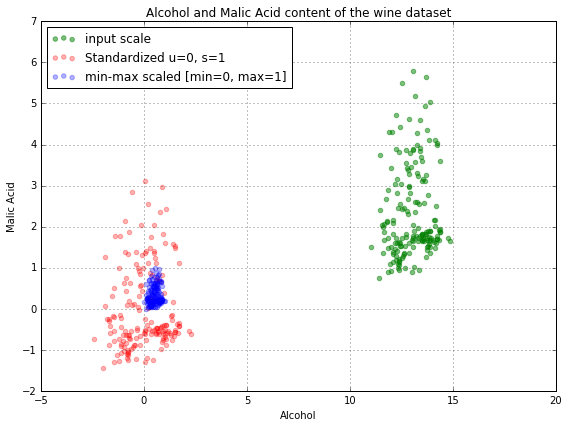

In [25]:
# and plot
%matplotlib inline

from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

 #   plt.scatter(df_std[:,0], df_std[:,1], color='red',
 #           label='Standardized [$$N  (\mu=0, \; \sigma=1)$$]', alpha=0.3)
    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3) # can't print: μ = 0, σ = 0
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

#### The plot above includes the wine datapoints on all three different scales: 
* the input scale  where the alcohol content was measured in volume-percent (green),
* the standardized features (red), and 
* the normalized features (blue). 

#### In the following plot, we will zoom in into the three different axis-scales while dispalying class values. 

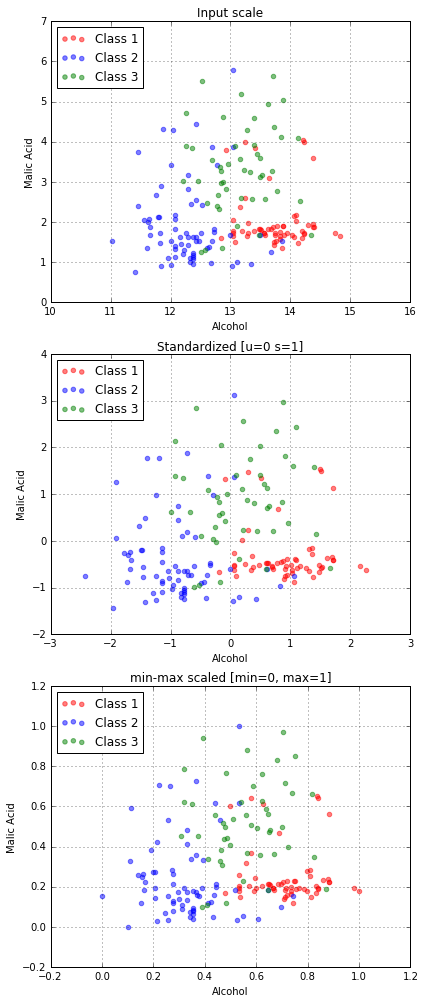

In [26]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized [u=0 s=1]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0],
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()

## Using other libraries for normalisation:

We use a simple synthetic data (x) to explain how can we implement normalisation manually and with numpy. We strat with z-score normalisation. 

### Z-score normalisation:

In [27]:
x = [1,4,5,6,6,2,3]
mean = sum(x)/len(x)
std_dev = (1/len(x) * sum([ (x_i - mean)**2 for x_i in x]))**0.5
mean, std_dev, np.mean(x), np.std(x)

(3, 0.0, 3.8571428571428572, 1.8070158058105026)

In [28]:
# 3 & 0 no good, look:
z_scores = [(x_i - mean)/std_dev for x_i in x]

ZeroDivisionError: float division by zero

In [ ]:
mean = sum(x)/float(len(x)) # force float, other ways to do this, e.g. future, numpy, Py3?
mean

In [ ]:
std_dev = (1/float(len(x)) * sum([(x_i - mean)**2 for x_i in x]))**0.5
std_dev

In [ ]:
# or
np.std(x)

In [ ]:
z_scores = [(x_i - mean)/std_dev for x_i in x]
z_scores

### Min-Max Normalisation:

In [ ]:
# Min-Max scaling
minmax = [(x_i - min(x)) / (max(x) - min(x)) for x_i in x]
minmax

In [ ]:
# that's also wrong, min (1) should scale to 0, max (6) to 1
# with the others distributed between [0 to 1] 
# Min-Max scaling, fix
minx = min(x) # and make it faster too
maxx = max(x) 
diff = float(maxx - minx) # force one to be float

minmax = [(x_i - minx) / diff for x_i in x]
minmax

### Using numpy:

In [ ]:
# numpy Standardization

x_np = np.asarray(x) # convert to list to array, better for maths 
z_scores_np = (x_np - x_np.mean()) / x_np.std()

# Min-Max scaling

np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())

In [ ]:
np_minmax # also wrong

In [ ]:
np_minmax = (x_np - x_np.min()) / (float(x_np.max()) - x_np.min()) # force float

In [ ]:
z_scores_np

In [ ]:
np_minmax

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

y_pos = [0 for i in range(len(x))]

ax1.scatter(z_scores, y_pos, color='g')
ax1.set_title('Python standardization', color='g')

ax2.scatter(minmax, y_pos, color='g')
ax2.set_title('Python Min-Max scaling', color='g')

ax3.scatter(z_scores_np, y_pos, color='b')
ax3.set_title('Python NumPy standardization', color='b')

ax4.scatter(np_minmax, y_pos, color='b')
ax4.set_title('Python NumPy Min-Max scaling', color='b')

plt.tight_layout()

for ax in (ax1, ax2, ax3, ax4):
    ax.get_yaxis().set_visible(False)
    ax.grid()

plt.show()

In [ ]:
# and we can see the effects of scaling using z-score (on the left), and MinMax (on the right)
# (except that there are two 1s, from the two 6s) e.g.
plt.hist(minmax)

In [ ]:
# and you can see Min-Max is standardised to [0.0....1.0] by default, 
# you can change by using a range, e.g. want range to be 3 to 5 so: 
np_minmax2 = (x_np - x_np.min()) / (float(x_np.max()) - x_np.min()) * (5 - 3) + 3

In [ ]:
np_minmax2

# Decimal scaling 
In decimal scaling, we need to find the abs max then divide all numbers by that number rounded up i.e. 6 --> 10


In [ ]:
abs(max(x))

In [ ]:
# then how many digits?
# use round if float
len(str(abs(max(x))))

In [ ]:
# then force up to next digit & force float
float(10**len(str(abs(max(x)))))

In [ ]:
# then divide all by this, works for -ves?
ds = x_np / 10.0
ds

In [ ]:
# and you can see values are scaled from 0.1 to 0.6
np.round(6,-1) # another way to do it

In [ ]:
plt.scatter(ds, y_pos) 

# Data Transformation:

Another way to reshape data is to perform data transformation. We will display an example of data that is with right skew (positive skew). We will need to compress large values. We first read the data used for this activity. 

In [ ]:
import pandas as pd
data = pd.read_csv("bmr.csv")

In [ ]:
data.head()

In [ ]:
plt.scatter(data["BMR(W)"], data["Mass(g)"]) # before

### So, which transformation type will suit this data?

In Tukey's ladder of power, we discussed different kind of transformation. We will try some here:

### Root transformation:

In [ ]:
import math
data['lmr'] = None
i = 0
for row in data.iterrows():
    data['lmr'].at[i] = math.sqrt(data["BMR(W)"][i])
    i += 1

    
data.head()

In [ ]:
data['lbm'] = None
i = 0
for row in data.iterrows():
    data['lbm'].at[i] = math.sqrt(data["Mass(g)"][i])
    i += 1

    
data.head()

In [ ]:
plt.scatter(data.lbm, data.lmr) # and after

#### Does it give a better spread of the data? Let's try something else.

### Square power transformation:

In [ ]:
import math
data['lmr'] = None
i = 0
for row in data.iterrows():
    data['lmr'].at[i] = math.pow(data["BMR(W)"][i],2)
    i += 1

    
data.head()

In [ ]:
data['lbm'] = None
i = 0
for row in data.iterrows():
    data['lbm'].at[i] = math.pow(data["Mass(g)"][i],2)
    i += 1

    
data.head()

In [ ]:
plt.scatter(data.lbm, data.lmr) # and after

#### Can you justify the output of this figure?

### Log transformation:

In [ ]:
import math
data['lmr'] = None
i = 0
for row in data.iterrows():
    data['lmr'].at[i] = math.log(data["BMR(W)"][i])
    i += 1

    
data.head()

In [ ]:
data['lbm'] = None
i = 0
for row in data.iterrows():
    data['lbm'].at[i] = math.log(data["Mass(g)"][i])
    i += 1

    
data.head()

In [ ]:
plt.scatter(data.lbm, data.lmr) # and after

Apparently, the best transformation for this data is log transformation. As the data is positively skewed. we will need to compress large values. That means we need to move down the ladder of powers to spread out data that is clustered at lower values. Therefore, logarithmic is the appropriate transformation in this case.

## Exercise:
Consider the following dataset:


In [ ]:
body_mass = [32000, 37800, 347000, 4200, 196500, 100000, 4290, 
32000, 65000, 69125, 9600, 133300, 150000, 407000, 115000, 67000, 
325000, 21500, 58588, 65320, 85000, 135000, 20500, 1613, 1618]

metabolic_rate = [49.984, 51.981, 306.770, 10.075, 230.073, 
148.949, 11.966, 46.414, 123.287, 106.663, 20.619, 180.150, 
200.830, 224.779, 148.940, 112.430, 286.847, 46.347, 142.863, 
106.670, 119.660, 104.150, 33.165, 4.900, 4.865]

#### What will be the appropriate transformation to apply for this data?